# Module 5 Lab

### Significance Testing

The Afterlife data file at the book’s website shows data from the 2018 General Social Survey on postlife = belief in the afterlife (1 = yes, 2 = no), religion (1 = Protestant, 2 = Catholic, 3 = Jewish, other categories excluded), and gender (1 = male, 2 = female). Analyze these data with methods of estimation and significance testing. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# Read in the data
afterlife = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Afterlife.dat', sep='\s+')
afterlife.head()

,subject,postlife,religion,gender
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


### Visualization of Data

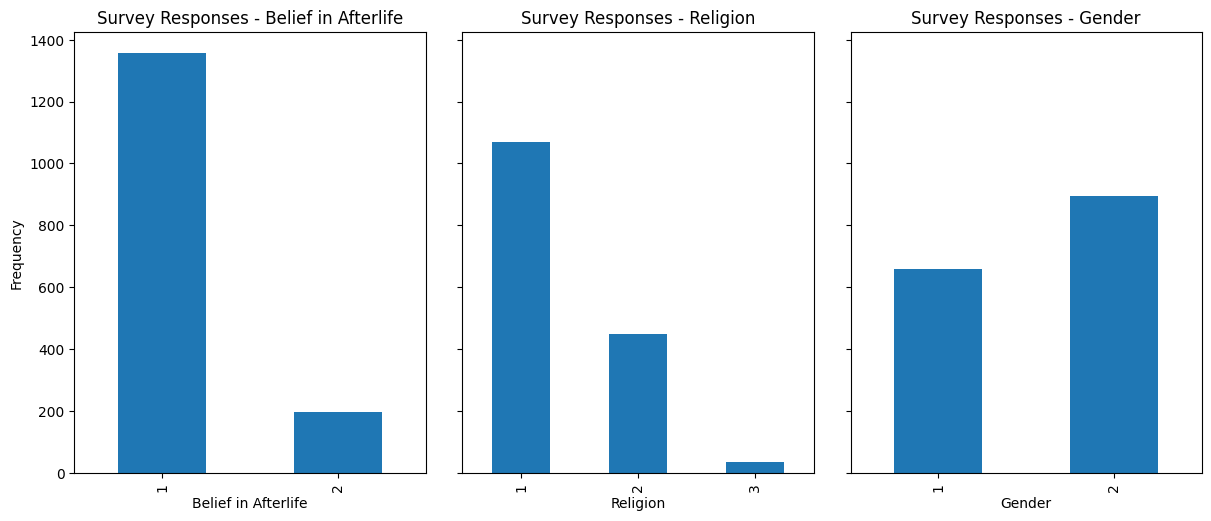

In [3]:
# Visualize distribution of each variable
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 5))
fig.tight_layout()
# Postlife
afterlife['postlife'].value_counts().plot(ax=ax1, kind='bar', xlabel='Belief in Afterlife', ylabel='Frequency', title='Survey Responses - Belief in Afterlife')
# Religion
afterlife['religion'].value_counts().plot(ax=ax2, kind='bar', xlabel='Religion', ylabel='Frequency', title='Survey Responses - Religion')
# Gender
afterlife['gender'].value_counts(sort=False).plot(ax=ax3, kind='bar', xlabel='Gender', ylabel='Frequency', title='Survey Responses - Gender')
plt.show()

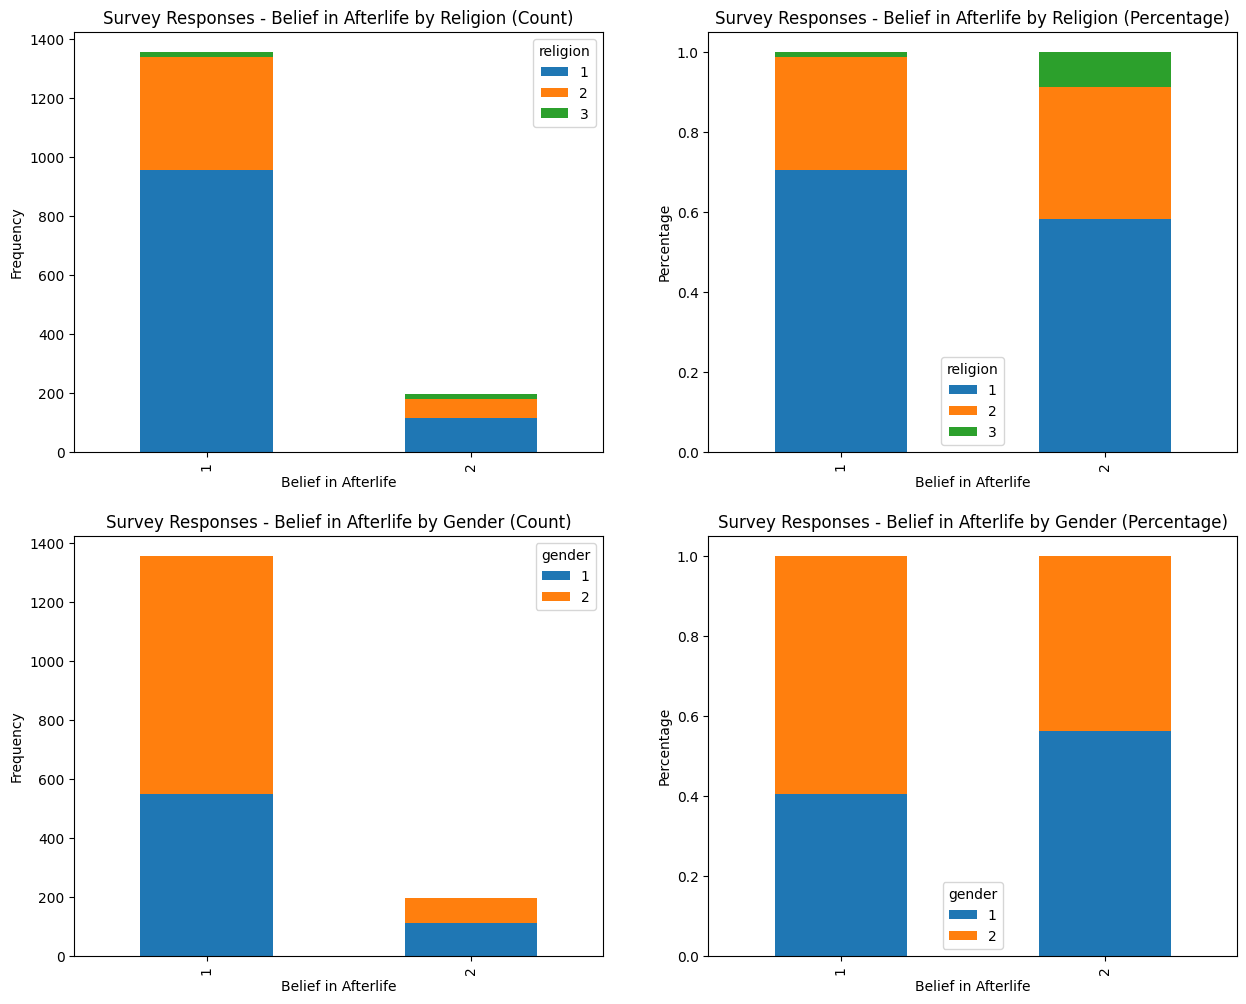

In [4]:
# Prepared data for visualization
def percent_of_total(second_column):
    percent_of_total = afterlife.groupby(['postlife', second_column]).size().unstack()
    for i in range(len(percent_of_total)):
        percent_of_total.iloc[i,:] = percent_of_total.iloc[i,:]/sum(percent_of_total.iloc[i,:])
    return percent_of_total
# Visualize relationship between afterlife and religion/gender
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 12))
# Count for religion and afterlife
afterlife.groupby(['postlife', 'religion']).size().unstack().plot(ax=ax1, kind='bar', stacked=True, xlabel='Belief in Afterlife', 
                                                                  ylabel='Frequency', title='Survey Responses - Belief in Afterlife by Religion (Count)')
# Percentage for religion and afterlife
religion = percent_of_total('religion')
religion.plot(ax=ax2, kind='bar', stacked=True, xlabel='Belief in Afterlife', 
              ylabel='Percentage', title='Survey Responses - Belief in Afterlife by Religion (Percentage)')
# Count for gender and afterlife
afterlife.groupby(['postlife', 'gender']).size().unstack().plot(ax=ax3, kind='bar', stacked=True, xlabel='Belief in Afterlife', 
                                                                ylabel='Frequency', title='Survey Responses - Belief in Afterlife by Gender (Count)')
# Percentage for religion and afterlife
gender = percent_of_total('gender')
gender.plot(ax=ax4, kind='bar', stacked=True, xlabel='Belief in Afterlife', 
            ylabel='Percentage', title='Survey Responses - Belief in Afterlife by Gender (Percentage)')
plt.show()

In [5]:
# Create frequency tables - gender
gender_table = pd.crosstab(afterlife['gender'], afterlife['postlife'])
print(gender_table)
print(' ')
print(pd.crosstab(afterlife['gender'], afterlife['postlife'], normalize='index'))

postlife    1    2
gender            
1         549  110
2         808   86
 
postlife         1         2
gender                      
1         0.833080  0.166920
2         0.903803  0.096197


In [6]:
# Create frequency tables - religion
religion_table = pd.crosstab(afterlife['religion'], afterlife['postlife'])
print(religion_table)
print(' ')
print(pd.crosstab(afterlife['religion'], afterlife['postlife'], normalize='index'))

postlife    1    2
religion          
1         956  114
2         384   65
3          17   17
 
postlife         1         2
religion                    
1         0.893458  0.106542
2         0.855234  0.144766
3         0.500000  0.500000


### Significance Testing

In [7]:
# Perform chi-square test to determine if there is a relationship between postlife and gender
def chisquare_test(table):
    stat, p_value, dof, expected = chi2_contingency(table, correction=False)
    # Interpret p-value
    alpha = 0.05
    print("The p-value is {}".format(p_value))
    if p_value <= alpha:
        print('There is a relationship between the variables.')
    else:
        print('There is no relationship between the variables.')

chisquare_test(gender_table)

The p-value is 3.354013036359813e-05
There is a relationship between the variables.


In [8]:
# Perform chi-square test to determine if there is a relationship between postlife and religion
chisquare_test(religion_table)

The p-value is 3.3620273113623977e-11
There is a relationship between the variables.


### Summary of Results

From the statistical tests we performed, we can conclude that there is a significant relationship between both gender and postlife belief and religion and postlife belief. Based on the bar plots produced, women are relatively more likely to believe in an afterlife than men. Relatively more Protestants also believe in an afterlife when compared to Jewish and Catholic respondents.